Une fois ces fichiers complétés, la librairie <tt>iads</tt> peut être importée dans ce notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

La commande <tt>help</tt> permet d'avoir des informations sur le contenu d'une librairie importée:

In [2]:
help(iads)

Help on package iads:

NAME
    iads

DESCRIPTION
    Package: iads
    File: __init__.py
    Année: semestre 2 - 2018-2019, Sorbonne Université

PACKAGE CONTENTS
    Classifiers
    LabeledSet
    utils

FILE
    d:\programmation\3i026\tme03\iads\__init__.py




In [3]:
help(ls)

Help on module iads.LabeledSet in iads:

NAME
    iads.LabeledSet

DESCRIPTION
    Package: iads
    Fichier: LabeledSet.py
    Année: semestre 2 - 2018-2019, Sorbonne Université

CLASSES
    builtins.object
        LabeledSet
    
    class LabeledSet(builtins.object)
     |  LabeledSet(input_dimension)
     |  
     |  Classe pour représenter un ensemble d'exemples (base d'apprentissage)
     |  Variables d'instance :
     |      - input_dimension (int) : dimension de la description d'un exemple (x)
     |      - nb_examples (int) : nombre d'exemples dans l'ensemble
     |  
     |  Methods defined here:
     |  
     |  __init__(self, input_dimension)
     |      Constructeur de LabeledSet
     |      Argument: 
     |          - intput_dimension (int) : dimension de x
     |      Hypothèse : input_dimension > 0
     |  
     |  addExample(self, vector, label)
     |      Ajout d'un exemple dans l'ensemble
     |      Argument: 
     |          - vector ()
     |          - label (i

In [4]:
help(cl)

Help on module iads.Classifiers in iads:

NAME
    iads.Classifiers

DESCRIPTION
    Package: iads
    Fichier: Classifiers.py
    Année: semestre 2 - 2018-2019, Sorbonne Université

CLASSES
    builtins.object
        Classifier
            ClassifierKNN
            ClassifierLineaireRandom
    
    class Classifier(builtins.object)
     |  Classifier(input_dimension)
     |  
     |  Classe pour représenter un classifieur
     |  Attention: cette classe est une classe abstraite, elle ne peut pas être
     |  instanciée.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, input_dimension)
     |      Constructeur de Classifier
     |      Argument:
     |          - intput_dimension (int) : dimension d'entrée des exemples
     |      Hypothèse : input_dimension > 0
     |  
     |  accuracy(self, dataset)
     |      Permet de calculer la qualité du système
     |  
     |  predict(self, x)
     |      rend la prediction sur x (-1 ou +1)
     |  
     |  train(self,

In [5]:
# Exemple d'utilisation de LabeledSet

une_base = ls.LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D

une_base.addExample([0, 1],1)   # ajout de l'exemple (0, 1) de classe +1
une_base.addExample([2, 3],1)   # ajout de l'exemple (2, 3) de classe +1
une_base.addExample([1, 2],-1)  # ajout de l'exemple (1, 2) de classe -1
une_base.addExample([2, 2],-1)  # ajout de l'exemple (2, 2) de classe -1

# Fonction pour afficher le LabeledSet
def affiche_base(LS):
    """ LabeledSet
        affiche le contenu de LS
    """
    for i in range(0,LS.size()):
        print("Exemple "+str(i))
        print("\tdescription : ",LS.getX(i))
        print("\tlabel : ",LS.getY(i))
    return

# Affichage de la base
affiche_base(une_base)

Exemple 0
	description :  [0 1]
	label :  [1]
Exemple 1
	description :  [2 3]
	label :  [1]
Exemple 2
	description :  [1 2]
	label :  [-1]
Exemple 3
	description :  [2 2]
	label :  [-1]


In [6]:
# Exemple d'utilisation de utils

the_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),30)

print("Taille de la base jouet générée :", the_set.size(), "exemples")

# Affichage :
ut.plot2DSet(the_set)



Taille de la base jouet générée : 60 exemples


100.0


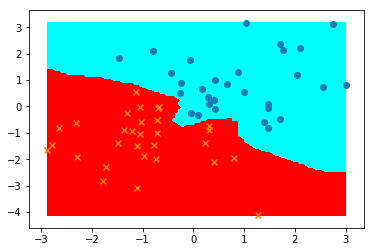

In [7]:
# Exemple d'utilisation de Classifiers pour créer un knn:

knn = cl.ClassifierKNN(2,3)

knn.train(the_set)
print(knn.accuracy(the_set))

ut.plot_frontiere(the_set,knn)
ut.plot2DSet(the_set)

Perceptron aléatoire
====

La classe <tt>ClassifierPerceptronRandom</tt> suivante hérite de la classe `Classifier`. Elle implémente un modèle de perceptron aléatoire qui modélise un hyperplan $f_w(x)=\langle w ; x \rangle$ tel que $w$ est tiré aléatoirement lors de la création.





In [8]:
class ClassifierPerceptronRandom(cl.Classifier):
    def __init__(self, input_dimension):
        """ Argument:
                - input_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        v = np.random.rand(input_dimension)     # vecteur aléatoire à input_dimension dimensions
        self.w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de v

    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.dot(x, self.w)
        if(z >= 0):
            return 1
        if(z < 0):
            return -1
        
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """        
        print("No training needed")

Accuracy :  50.0


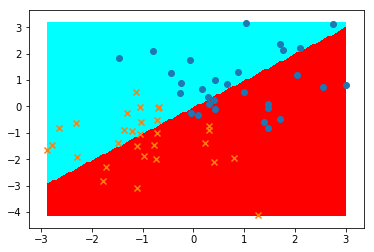

In [9]:
# Exemple de création et d'utilisation d'un Perceptron aléatoire:

perceptron_random = ClassifierPerceptronRandom(2)
print("Accuracy : ",perceptron_random.accuracy(the_set))
ut.plot_frontiere(the_set,perceptron_random)
ut.plot2DSet(the_set)

Perceptron de Rosenblatt
===

<tt>ClassifierPerceptron</tt> implémente l'algorithme du Perceptron de Rosenblatt vu en cours.

La fonction `train` fera une itération sur l'ensemble des données de l'apprentissage. Les points d'apprentissage seront tirés dans un ordre aléatoire.



In [10]:
class ClassifierPerceptron(cl.Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self,input_dimension,learning_rate):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        
        v = np.random.rand(input_dimension)     # vecteur aléatoire à input_dimension dimensions
        self.w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de v
        self.lr = learning_rate
        self.input_dimension = input_dimension

    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.dot(x, self.w)
        if(z >= 0):
            return 1
        if(z < 0):
            return -1

    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        
        #print("Before training W = ",self.w)
        
        for k in range(labeledSet.size()):
            lr = self.lr
            x = labeledSet.getX(k)
            y = labeledSet.getY(k)



            #print("Accuracy : ",self.accuracy(labeledSet))
                
            self.w = self.w + lr*(y*x)
        
        #print("After Training W = ",self.w)

In [272]:
the_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),80)
perceptron = ClassifierPerceptron(2,0.0001)

Accuracy = []
Accuracy.append(perceptron.accuracy(the_set))

for i in range(500):
    perceptron.train(the_set)
    acc = perceptron.accuracy(the_set)
    #print("Accuracy : ",acc)
    Accuracy.append(acc)    




plt.plot(Accuracy)
plt.show()

ut.plot_frontiere(the_set,perceptron,step=100)
ut.plot2DSet(the_set)


In [52]:
perceptron.accuracy(the_set)

91.875

Tests sur le perceptron:
- Apprendre pendant N itérations
- Afficher l'accuracy du modèle à chaque itération
- Vérifier que l'accuracy baisse
- Dessiner la frontière obtenue

In [273]:
def split_set(labeledSet,PourcentageTraining):
    input_dimension = labeledSet.getInputDimension()
    
    lstn = ls.LabeledSet(input_dimension)
    lstt = ls.LabeledSet(input_dimension)
    
    limitTN = labeledSet.size() * PourcentageTraining/100
    cpt = 0;
    
    
    for i in range (labeledSet.size()):
        if (i < limitTN ):
            lstn.addExample(labeledSet.getX(i),labeledSet.getY(i))
            cpt += 1
        else:
            lstt.addExample(labeledSet.getX(i),labeledSet.getY(i))
    return lstn,lstt


the_set_toSplit = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),400)
the_set_training,the_set_testing = split_set(the_set_toSplit,90)

In [14]:
table_perceptron = []

nombre_perceptron = 4
depart = 0.1
coef = 40


for i in range (nombre_perceptron):
    table_perceptron.append(ClassifierPerceptron(2,depart + coef * i))

    table_perceptron[i].train(the_set_training)
    print("Alpha = ",depart + coef * i, " // Accuracy : ",table_perceptron[i].accuracy(the_set_testing))


#Affichage du premier perceptron (Alpha = 0.1)
ut.plot_frontiere(the_set_testing,table_perceptron[0])
ut.plot2DSet(the_set_testing)

#Affichage du dernier perceptron (Alpha = 0.9)
ut.plot_frontiere(the_set_testing,table_perceptron[3])
ut.plot2DSet(the_set_testing)

"""Si le learning rate est petit. Il faut un grand jeu d'apprentissage et un nombre N grand (Convergence lente)
Si le learning rate est trop grand, alors il y a une eventuelle Convergence rapide mais divergence après)"""

Alpha =  0.1  // Accuracy :  96.25
Alpha =  40.1  // Accuracy :  96.25
Alpha =  80.1  // Accuracy :  96.25
Alpha =  120.1  // Accuracy :  96.25


"Si le learning rate est petit. Il faut un grand jeu d'apprentissage et un nombre N grand (Convergence lente)\nSi le learning rate est trop grand, alors il y a une eventuelle Convergence rapide mais divergence après)"

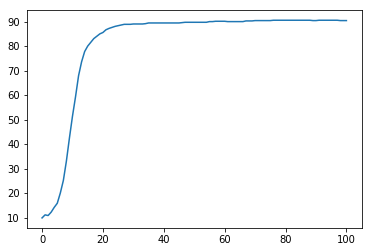

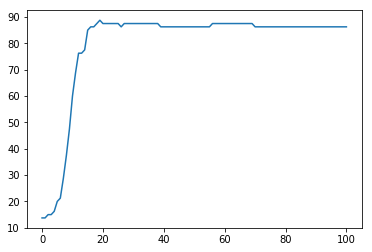

In [277]:
perceptron_r = ClassifierPerceptron(2,0.001)


Accuracy0 = []
Accuracy0.append(perceptron_r.accuracy(the_set_training))
Accuracy1 = []
Accuracy1.append(perceptron_r.accuracy(the_set_testing))

for i in range(100):
    perceptron_r.train(the_set)
    acc = perceptron_r.accuracy(the_set_training)
    #print("Accuracy : ",acc)
    Accuracy0.append(acc)    
    acc = perceptron_r.accuracy(the_set_testing)
    Accuracy1.append(acc)




plt.plot(Accuracy0)
plt.show()

plt.plot(Accuracy1)
plt.show()

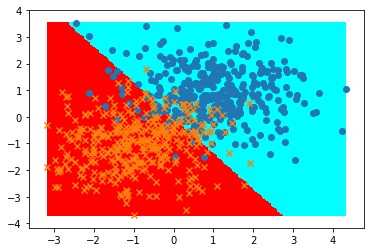

In [278]:
ut.plot_frontiere(the_set_training,perceptron_r,step=100)
ut.plot2DSet(the_set_training)

**Données XOR**

La fonction `createXOR` étant donné un nombre de points $n$ et une variance $var$, permet de générer une base de données contenant:
- deux gaussiennes centrées en (0,0) et (1,1) correspondant à $n$ exemples positifs
- deux gaussiennes centrées en (1,0) et (0,1) correspondant à $n$ exemples négatifs

Dans la suite, on appelle XOR une base de données créée par cette fonction.

In [279]:
import math 

def concatenate(ls1,ls2):
    LS = ls.LabeledSet(ls1.getInputDimension())
    
    for i in range(ls1.size()):
        LS.addExample(ls1.getX(i),ls1.getY(i))
    for i in range(ls2.size()):
        LS.addExample(ls2.getX(i),ls2.getY(i))
    return LS
    
def createXOR(nb_points,var):
    sigma = var
    
    ls1 = ut.createGaussianDataset(np.array([0,0]),sigma * np.array([[1,0],[0,1]]),np.array([1,0]),sigma * np.array([[1,0],[0,1]]),math.ceil(nb_points/2))
    ls2 = ut.createGaussianDataset(np.array([1,1]),sigma * np.array([[1,0],[0,1]]),np.array([0,1]),sigma * np.array([[1,0],[0,1]]),math.floor(nb_points/2))
    
    
    
    return concatenate(ls1,ls2)

def shuffle_ls(labeledSet):
    
    size = labeledSet.size()
    input_dimension = labeledSet.getInputDimension()
    
    new_LS = ls.LabeledSet(input_dimension)
    
    if size == 0:
        return
    
    npx = np.empty((size,input_dimension), np.double)
    npy = np.empty((size,1),np.double)
    
    for i in range(0,labeledSet.size()):
        npx[i] = labeledSet.getX(i)
        npy[i] = labeledSet.getY(i)
    
    
    matrix_res = np.concatenate((npx,npy),axis=1)
    
    np.random.shuffle(matrix_res)
    #print(matrix_res)

    res = np.array_split(matrix_res,input_dimension,axis=1)
    
    for i in range(size):
        new_LS.addExample(res[0][i],res[1][i])
    return new_LS


In [280]:
xor=createXOR(100,0.01)
ut.plot2DSet(xor)

In [283]:
shuffled = shuffle_ls(xor)
training_set, testing_set = split_set(shuffled,70)

#print(affiche_base(xor))
#print(affiche_base(testing_set))


perceptron_fail = ClassifierPerceptron(2,0.2)
for i in range(100):
    perceptron_fail.train(training_set)


ut.plot_frontiere((testing_set),perceptron_fail)
ut.plot2DSet(((testing_set)))
print("Accuracy : ",perceptron_fail.accuracy(testing_set))

"""Problème : Pour -1 et 1 sont répartis selon 2 pattern"""

Accuracy :  60.0


'Problème : Pour -1 et 1 sont répartis selon 2 pattern'

Kernel Trick
--------------

Nous allons projeter (manuellement) les données 2D dans un espace de plus grande dimension. Voici un exemple de projection qui transforme un vecteur $(x_1,x_2)$ en un vecteur $(x_1,x_2,1)$

In [284]:
class KernelBias:
    def transform(self,x):
        y=np.asarray([x[0],x[1],1])
        return y

k=KernelBias()
k.transform(the_set.getX(1))


array([-0.38724081, -0.50456556,  1.        ])

La classe ClassifierPerceptronKernel prend un Kernel en paramètre, et calcule le perceptron sur la version "kernélisée" des données.

In [318]:
class ClassifierPerceptronKernel(cl.Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        ##TODO
        self.k = kernel
        self.lr = learning_rate
        self.input_dimension = dimension_kernel

        v = np.random.rand(self.input_dimension)     # vecteur aléatoire à input_dimension dimensions
        self.w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de v
        #print(self.w)
        
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.dot(self.k.transform(x), self.w)
        if(z >= 0):
            return 1
        if(z < 0):
            return -1
        
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        
        #print("Before training",self.w)
        
        for k in range(labeledSet.size()):
            lr = self.lr
            x = self.k.transform(labeledSet.getX(k))
            y = labeledSet.getY(k)
            yt = self.predict(labeledSet.getX(k))
            #print(self.w,y,x)

            #print("Accuracy : ",self.accuracy(labeledSet))
            
            self.w = self.w + lr*(y-yt)*x
            
            #print("lr*y*x : ",lr*(y*x))
        #print("After Training",self.w)

Accuracy :  86.25


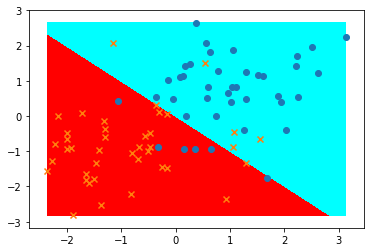

In [286]:
perceptron_kernel = ClassifierPerceptronKernel(3,0.1,k)

for i in range(100):
    
    perceptron_kernel.train(the_set_training)


ut.plot_frontiere(the_set_testing,perceptron_kernel)
ut.plot2DSet(the_set_testing)
print("Accuracy : ",perceptron_kernel.accuracy(the_set_testing))


Accuracy :  48.333333333333336


"Problème : Pour -1 et 1 il existe 2 pattern que l'algo doit apprendre. Il n'est pas conçu pour une telle chose"

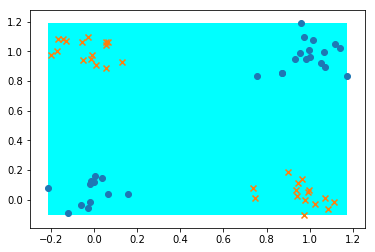

In [287]:
perceptron_kernel = ClassifierPerceptronKernel(3,0.001,k)

Accuracy0 = []
for i in range(100):
    perceptron_kernel.train(training_set)
    acc = perceptron_kernel.accuracy(testing_set)
    Accuracy0.append(acc)

    
plt.plot(Accuracy0)
plt.show()

ut.plot_frontiere(testing_set,perceptron_kernel)
ut.plot2DSet(testing_set)
print("Accuracy : ",perceptron_kernel.accuracy(testing_set))

"""Problème : Pour -1 et 1 il existe 2 pattern que l'algo doit apprendre. Il n'est pas conçu pour une telle chose"""

Kernel : $(x_1,x_2) \rightarrow (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$.

# Test KernelPoly sur XOR

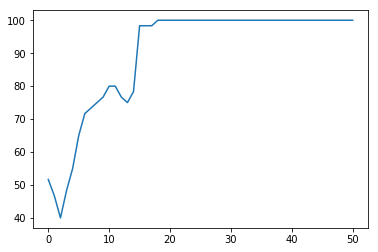

Accuracy on testing :  100.0


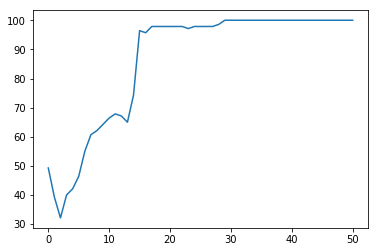

Accuracy on training :  100.0


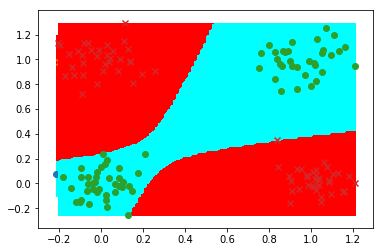

In [319]:
class KernelPoly:
    def transform(self,x):
        x1 = x[0]
        x2 = x[1]
        y=np.asarray([1,x1,x2,x1*x1,x2*x2,x1*x2])
        return y




N=50
k=KernelPoly()
perceptron_k=ClassifierPerceptronKernel(6,0.001,k)

##TESTER SUR XOR ET DESSINER LA FRONTIèRE DE DECISION
Accuracy0 = []
Accuracy0.append(perceptron_k.accuracy(testing_set))

Accuracy1 = []
Accuracy1.append(perceptron_k.accuracy(training_set))


for i in range(N):
    shuffle_ls(training_set)
    perceptron_k.train(training_set)
    acc = perceptron_k.accuracy(testing_set)
    Accuracy0.append(acc)
    
    acc = perceptron_k.accuracy(training_set)
    Accuracy1.append(acc)

    
plt.plot(Accuracy0)
plt.show()
print("Accuracy on testing : ",perceptron_k.accuracy(testing_set))
plt.plot(Accuracy1)
plt.show()
print("Accuracy on training : ",perceptron_k.accuracy(training_set))
ut.plot_frontiere(testing_set,perceptron_k)
ut.plot2DSet(testing_set)

ut.plot_frontiere(training_set,perceptron_k)
ut.plot2DSet(training_set)




Ici la fontière de décision est définie selon 2 fonctions carrés.